In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

from fontTools.varLib.avar.plan import SAMPLES

In [2]:
Class = ['QPSK','16QAM','8PSK']
DATA_DIR = "D:\dataset\generate noisy signal"
IMG_SIZE = 128
SAMPLES_PER_CLASS = 1000

In [3]:
for c in Class:
    os.makedirs(os.path.join(DATA_DIR, c), exist_ok=True)

In [4]:

def generate_noisy_signal(mod_type , n_symbols = 100):

    if mod_type == 'QPSK':
        symbols = (np.random.choice([-1,1] , n_symbols) +1j * np.random.choice([-1,1] , n_symbols))
    elif mod_type == '16QAM':
        symbols = (np.random.choice([-3,-1,1,3] , n_symbols)+ 1j *np.random.choice([-3,-1,1,3] , n_symbols))
    elif mod_type == '8PSK':
        phases = np.random.choice(np.arange(0 , 2*np.pi , 2*np.pi/8) , n_symbols)
        symbols = np.exp(1j * phases)

    snr_db = np.random.uniform(5, 20)
    sig_power = np.mean(np.abs(symbols)**2)
    noise_power = sig_power /(10**(snr_db/10))
    noise = (np.random.normal(0,np.sqrt(noise_power/2) , n_symbols) + 1j * np.random.normal(0, np.sqrt(noise_power/2) , n_symbols))

    return symbols + noise







In [5]:
print("Generating Data...")

for label in Class:
    print(f"Generating Noisy Signal for {label}...")
    for i in range (SAMPLES_PER_CLASS):
        signal = generate_noisy_signal(label)
        plt.figure(figsize=(1,1), dpi= IMG_SIZE)
        plt.scatter(signal.real , signal.imag , s=1 , c='black' , alpha=0.6)
        plt.xlim(-4.5,4.5)
        plt.ylim(-4.5,4.5)
        plt.axis('off')
        plt.savefig(f"{DATA_DIR}/{label}/{i}.png" , bbox_inches='tight' , pad_inches=0)
        plt.close()
print(f"Done! Created {SAMPLES_PER_CLASS * 3} images in '{DATA_DIR}' folder.")

Generating Data...
Generating Noisy Signal for QPSK...
Generating Noisy Signal for 16QAM...
Generating Noisy Signal for 8PSK...
Done! Created 3000 images in 'D:\dataset\generate noisy signal' folder.


### test

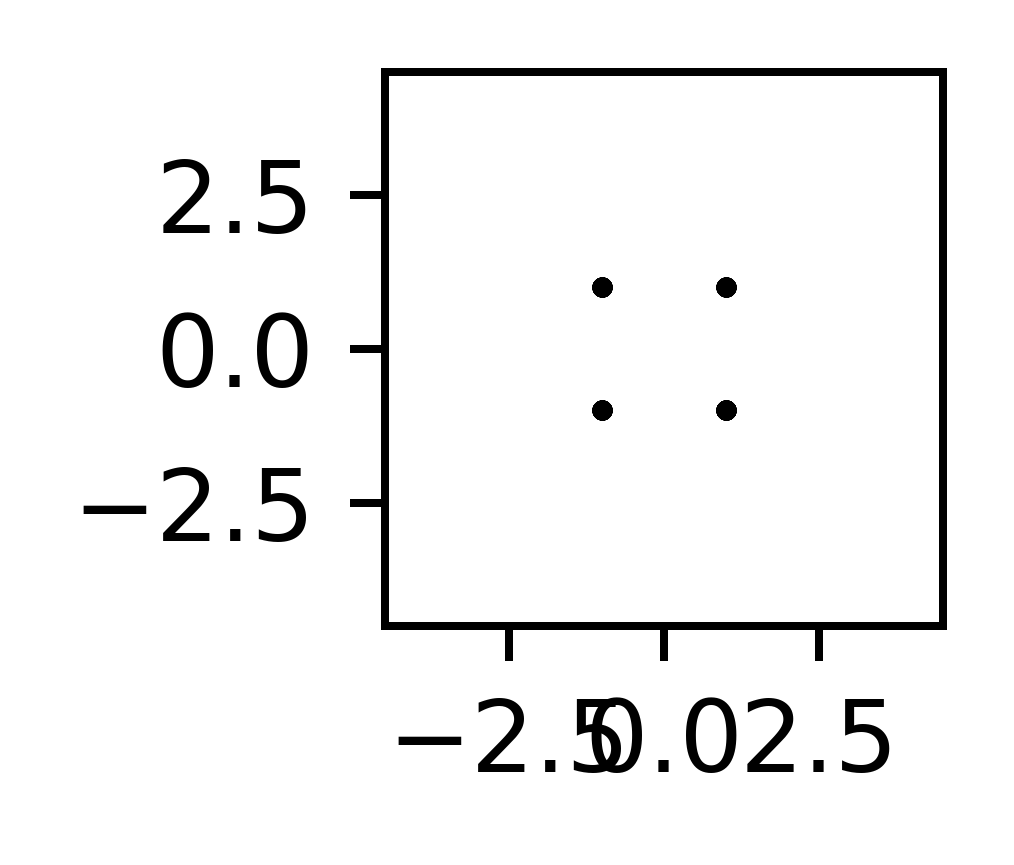

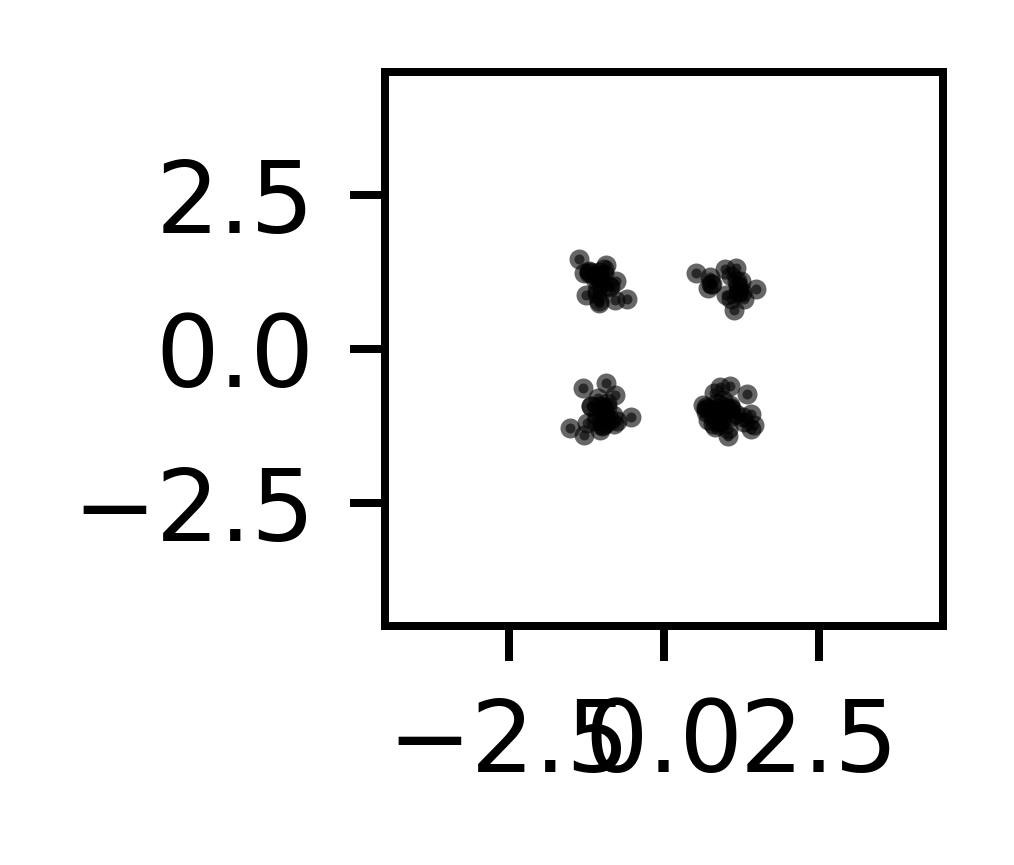

In [18]:
symbols = (np.random.choice([-1,1] , 100) +1j * np.random.choice([-1,1] , 100))
plt.figure(figsize=(1,1), dpi= 720)
plt.scatter(symbols.real , symbols.imag , s=1 , c='black' , alpha=0.6)
plt.xlim(-4.5,4.5)
plt.ylim(-4.5,4.5)
#plt.axis('off')
plt.savefig(f"{DATA_DIR}/{label}/{i}.png" , bbox_inches='tight' , pad_inches=0)
plt.show(())
plt.close()

snr_db = np.random.uniform(5, 20)
sig_power = np.mean(np.abs(symbols)**2)
noise_power = sig_power /(10**(snr_db/10))
noise = (np.random.normal(0,np.sqrt(noise_power/2) , 100) + 1j * np.random.normal(0, np.sqrt(noise_power/2) , 100))
x = symbols + noise
plt.figure(figsize=(1,1), dpi= 720)
plt.scatter(x.real , x.imag , s=1 , c='black' , alpha=0.6)
plt.xlim(-4.5,4.5)
plt.ylim(-4.5,4.5)
#plt.axis('off')
plt.savefig(f"{DATA_DIR}/{label}/{i}.png" , bbox_inches='tight' , pad_inches=0)
plt.show(())
plt.close()

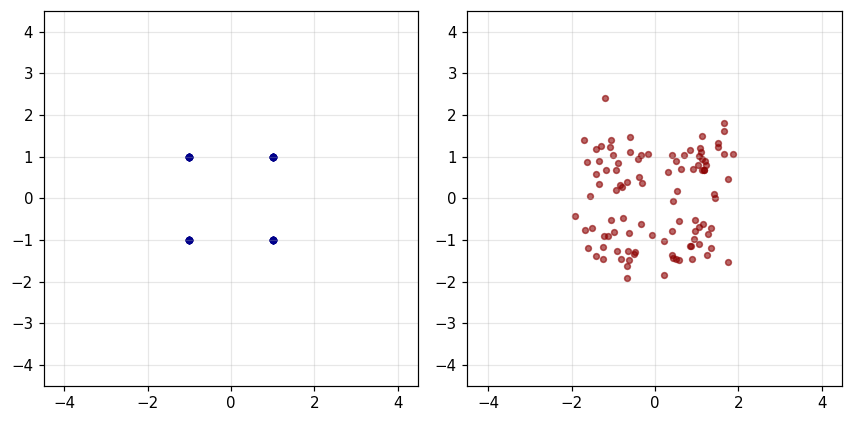

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# DATA_DIR ו-label צריכים להיות מוגדרים מראש
# נניח:
label = 'QPSK'
i = 0
n_symbols = 100

# --- 1. יצירת האות הנקי והאות המלא ---

# יצירת האות הנקי (QPSK)
symbols = (np.random.choice([-1, 1], n_symbols) +
           1j * np.random.choice([-1, 1], n_symbols))

# הוספת רעש (AWGN)
snr_db = np.random.uniform(5, 20)
sig_power = np.mean(np.abs(symbols)**2)
noise_power = sig_power / (10**(snr_db/10))
# חלוקת עוצמת הרעש שווה בשווה בין הרכיב הממשי והמדומה
std_dev = np.sqrt(noise_power / 2)
noise = (np.random.normal(0, std_dev, n_symbols) +
         1j * np.random.normal(0, std_dev, n_symbols))
x = symbols + noise # האות המקבל

# --- 2. הצגה בשני גרפים צמודים ---

# יצירת דמות אחת ושני צירי גרף (1 שורה, 2 עמודות)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=108)

# הגדרת גבולות קבועים לשני הגרפים
plot_lim = 4.5
title_fontsize = 10

# === גרף שמאלי: אות נקי (Constellation) ===
ax1.scatter(symbols.real, symbols.imag, s=15, c='darkblue', alpha=0.8)
ax1.set_xlim(-plot_lim, plot_lim)
ax1.set_ylim(-plot_lim, plot_lim)
ax1.set_aspect('equal', adjustable='box') # שומר על פרופורציות
ax1.grid(True, alpha=0.3)

# === גרף ימני: אות עם רעש (Constellation) ===
ax2.scatter(x.real, x.imag, s=15, c='darkred', alpha=0.6)
ax2.set_xlim(-plot_lim, plot_lim)
ax2.set_ylim(-plot_lim, plot_lim)
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True, alpha=0.3)

# שיפור הרווח בין הגרפים
plt.tight_layout()

# הצגה ושמירה (פעם אחת)
plt.savefig(f"{DATA_DIR}/{label}/{i}_comparison.png", dpi=300)
plt.show()
plt.close()